<a href="https://colab.research.google.com/github/sabahonarmand/DataMining-NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df=pd.read_csv("train.csv",sep='\t')
df_test = pd.read_csv("test.csv",sep='\t')
df.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)
df_test

,comment,label,label_id
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1
...,...,...,...
6995,سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...,SAD,1
6996,بسته بندی خیلی بسیار بد شده,SAD,1
6997,سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...,HAPPY,0
6998,غذا سرد و کیفیت قابل قبول نبود,SAD,1


**Preprocessing**

In [ ]:
print('data information')
print(df.info(), '\n')

# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

print('test data information')
print(df_test.info(), '\n')

# print missing values information
print('test missing values stats')
print(df_test.isnull().sum(), '\n')

data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56700 entries, 0 to 56699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   56700 non-null  object
 1   label     56700 non-null  object
 2   label_id  56700 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
None 

missing values stats
comment     0
label       0
label_id    0
dtype: int64 

test data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   7000 non-null   object
 1   label     7000 non-null   object
 2   label_id  7000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 164.2+ KB
None 

test missing values stats
comment     0
label       0
label_id    0
dtype: int64 



In [ ]:
!pip install hazm

     |████████████████████████████████| 316 kB 8.5 MB/s 
     |████████████████████████████████| 1.4 MB 56.9 MB/s 
     |████████████████████████████████| 233 kB 64.5 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=777bce27a195d3cf8838d5167c442688dceaaf24a45aa479206c5b254d918bbc
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=153420 sha256=893f2e1c3ed52578bd223dcbfe5b0b02d62dc34da5b11e826e7d7bb4d8c62a51
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
!pip install clean-text

     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 174 kB 13.1 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=270a7b9fde1df54887921deb04376d20ab6f4808e2372806ef7e8a0ee0a3d5d3
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=b3b22cb77563e80857a4b2b05784b4f5a5ebb800e497d46d55cd25ade2a8565a
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built ftfy emoji


In [ ]:
import re
from cleantext import clean
import hazm

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext
def cleaning(text):
    text = text.strip()

    # cleaning htmls
    text = cleanhtml(text)
    text=clean(text,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=False,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",)
    # normalizing
    normalizer = hazm.Normalizer()
    text = normalizer.normalize(text)

    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u200c"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)
    
    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    
    return text

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
# cleaning comments
df['cleaned_comment'] = df['comment'].apply(cleaning)
df_test['cleaned_comment'] = df_test['comment'].apply(cleaning)
df_test

,comment,label,label_id,cleaned_comment
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0,غذا گرم رسید کیفیت و پخت گوشت عالی بود
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1,باز هم میگم، پیتزا نباید اینقد چرب باشه
...,...,...,...,...
6995,سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...,SAD,1,سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...
6996,بسته بندی خیلی بسیار بد شده,SAD,1,بسته بندی خیلی بسیار بد شده
6997,سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...,HAPPY,0,سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...
6998,غذا سرد و کیفیت قابل قبول نبود,SAD,1,غذا سرد و کیفیت قابل قبول نبود


In [ ]:
# calculate the length of comments based on their words
df['cleaned_comment_len_by_words'] = df['cleaned_comment'].apply(lambda t: len(hazm.word_tokenize(t)))
df_test['cleaned_comment_len_by_words'] = df_test['cleaned_comment'].apply(lambda t: len(hazm.word_tokenize(t)))
df_test

,comment,label,label_id,cleaned_comment,cleaned_comment_len_by_words
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,33
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0,غذا گرم رسید کیفیت و پخت گوشت عالی بود,9
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,27
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,51
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1,باز هم میگم، پیتزا نباید اینقد چرب باشه,9
...,...,...,...,...,...
6995,سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...,SAD,1,سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...,22
6996,بسته بندی خیلی بسیار بد شده,SAD,1,بسته بندی خیلی بسیار بد شده,6
6997,سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...,HAPPY,0,سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...,15
6998,غذا سرد و کیفیت قابل قبول نبود,SAD,1,غذا سرد و کیفیت قابل قبول نبود,7


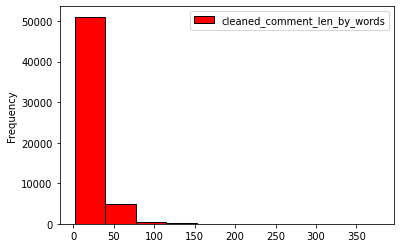

In [ ]:
import matplotlib.pyplot as plt
cleaned_comment_len_by_words = df.loc[:,['cleaned_comment_len_by_words']].plot.hist(color = 'red', edgecolor = 'black') 

In [ ]:
df['cleaned_comment_len_by_words'] = df['cleaned_comment_len_by_words'].apply(lambda len_t: len_t if len_t <= 100 else None)
df = df.dropna(subset=['cleaned_comment_len_by_words'])
df = df.reset_index(drop=True)
df

,comment,label,label_id,cleaned_comment,cleaned_comment_len_by_words
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,9.0
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,28.0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,19.0
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,21.0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0,شیرینی وانیلی فقط یک مدل بود.,7.0
...,...,...,...,...,...
56428,یک تیکه کم فرستاده بودن و با تماس من در کمترین...,HAPPY,0,یک تیکه کم فرستاده بودن و با تماس من در کمترین...,22.0
56429,عالی بود همه چیز ممنونم پیک هم خیلی مرتب و به ...,HAPPY,0,عالی بود همه چیز ممنونم پیک هم خیلی مرتب و به ...,14.0
56430,مثل همیشه عالی، من چندمین باره سفارش میدم و هر...,HAPPY,0,مثل همیشه عالی، من چندمین باره سفارش میدم و هر...,79.0
56431,دلستر استوایی خواسته بودم اما لیمویی فرستادند,HAPPY,0,دلستر استوایی خواسته بودم اما لیمویی فرستادند,6.0


In [ ]:
df_test['cleaned_comment_len_by_words'] = df_test['cleaned_comment_len_by_words'].apply(lambda len_t: len_t if len_t <= 100 else None)
df_test = df_test.dropna(subset=['cleaned_comment_len_by_words'])
df_test = df_test.reset_index(drop=True)
df_test

,comment,label,label_id,cleaned_comment,cleaned_comment_len_by_words
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,33.0
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0,غذا گرم رسید کیفیت و پخت گوشت عالی بود,9.0
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,27.0
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,51.0
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1,باز هم میگم، پیتزا نباید اینقد چرب باشه,9.0
...,...,...,...,...,...
6964,سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...,SAD,1,سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...,22.0
6965,بسته بندی خیلی بسیار بد شده,SAD,1,بسته بندی خیلی بسیار بد شده,6.0
6966,سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...,HAPPY,0,سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...,15.0
6967,غذا سرد و کیفیت قابل قبول نبود,SAD,1,غذا سرد و کیفیت قابل قبول نبود,7.0


In [ ]:
df = df[['cleaned_comment', 'label_id']]
df.columns = ['comment', 'label_id']
df.head()

,comment,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,0
4,شیرینی وانیلی فقط یک مدل بود.,0


In [ ]:
df_test = df_test[['cleaned_comment', 'label_id']]
df_test.columns = ['comment', 'label_id']
df_test.head()

,comment,label_id
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,0
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,0
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,1
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,1
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train = df['comment']
y_train = df['label_id']
X_test = df_test['comment']
y_test = df_test['label_id']
X_test

0       خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...
1                  غذا گرم رسید کیفیت و پخت گوشت عالی بود
2       قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...
3       عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...
4                 باز هم میگم، پیتزا نباید اینقد چرب باشه
                              ...                        
6964    سطح پیتزا سوخته بود متاسفانه و ارزش اون پولو ن...
6965                          بسته بندی خیلی بسیار بد شده
6966    سلام خسته نباشید همه چی خوب بود فقط یک مقدار م...
6967                       غذا سرد و کیفیت قابل قبول نبود
6968                یه کم خشک بود ولی در مجموع خوشمزه بود
Name: comment, Length: 6969, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer 
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
max_length = 100 
padding_type='post' 
truncation_type='post'
from keras.preprocessing.sequence import pad_sequences 
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, padding=padding_type, truncating=truncation_type)
X_train_sequences

In [ ]:
from keras.preprocessing.text import Tokenizer 
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'بود': 2,
 'و': 3,
 'به': 4,
 'از': 5,
 'که': 6,
 'خیلی': 7,
 'هم': 8,
 'غذا': 9,
 'کیفیت': 10,
 'خوب': 11,
 'با': 12,
 'عالی': 13,
 'شده': 14,
 'سفارش': 15,
 'ولی': 16,
 'در': 17,
 'این': 18,
 'رو': 19,
 'من': 20,
 'بسیار': 21,
 'نبود': 22,
 'پیتزا': 23,
 'واقعا': 24,
 'رسید': 25,
 'اصلا': 26,
 'سرد': 27,
 'فقط': 28,
 'خوشمزه': 29,
 'ارسال': 30,
 'طعم': 31,
 'یک': 32,
 'ممنون': 33,
 'کم': 34,
 'همیشه': 35,
 'مرغ': 36,
 'بد': 37,
 'تازه': 38,
 'پیک': 39,
 'یه': 40,
 'برای': 41,
 'کاملا': 42,
 'تا': 43,
 'بود،': 44,
 'سیب': 45,
 'اما': 46,
 'بودم': 47,
 'داشت': 48,
 'تحویل': 49,
 'مزه': 50,
 'همه': 51,
 'مثل': 52,
 'نداشت': 53,
 'بسته': 54,
 'بی': 55,
 'بودن': 56,
 'سس': 57,
 '…': 58,
 'نان': 59,
 'گرم': 60,
 'قیمت': 61,
 'شد': 62,
 'اینکه': 63,
 'متاسفانه': 64,
 'حجم': 65,
 'رستوران': 66,
 'نسبت': 67,
 'اسنپ': 68,
 'تو': 69,
 'دادم': 70,
 'ساندویچ': 71,
 'زمینی': 72,
 'داده': 73,
 'بندی': 74,
 'دیگه': 75,
 'نون': 76,
 'سریع': 77,
 'پایین': 78,
 'راضی': 79,
 'کیک': 80,
 'س

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_sequences[3:7]

[[6576,
  2,
  51,
  299,
  213,
  3,
  4,
  207,
  3,
  10,
  897,
  1,
  35,
  1175,
  11,
  100,
  109,
  106,
  593,
  4456],
 [82, 1389, 28, 32, 539, 2],
 [351, 655, 6, 43, 4, 441, 264, 47],
 [5, 51, 576, 13, 116]]

**Padding**

In [ ]:
from keras.preprocessing.sequence import pad_sequences 
max_length = 100 
padding_type='post' 
truncation_type='post'
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, padding=padding_type, truncating=truncation_type)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=truncation_type)
X_train_padded

array([[  24,  435,  308, ...,    0,    0,    0],
       [ 345,    2,  221, ...,    0,    0,    0],
       [  61,   18,  539, ...,    0,    0,    0],
       ...,
       [  52,   35,  402, ...,    0,    0,    0],
       [ 748, 2401,  604, ...,    0,    0,    0],
       [ 119,   36,  834, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train_padded.shape

(56433, 100)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM

**Word2Vector**

In [ ]:
import numpy as np
embeddings_index = {}
f = open("/content/drive/MyDrive/model.txt",errors='replace', mode='r')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
embeddings_index

{'966446': array([100.], dtype=float32),
 '</s>': array([ 4.003e-03,  4.419e-03, -3.830e-03, -3.278e-03,  1.367e-03,
         3.021e-03,  9.410e-04,  2.110e-04, -3.604e-03,  2.218e-03,
        -4.356e-03,  1.250e-03, -7.510e-04, -9.570e-04, -3.316e-03,
        -1.882e-03,  2.579e-03,  3.025e-03,  2.969e-03,  1.597e-03,
         1.545e-03, -3.803e-03, -4.096e-03,  4.970e-03,  3.801e-03,
         3.090e-03, -6.040e-04,  4.016e-03, -4.950e-04,  7.350e-04,
        -1.490e-04, -2.983e-03,  1.312e-03, -1.337e-03, -3.825e-03,
         4.754e-03,  4.379e-03, -1.095e-03, -2.260e-04,  5.090e-04,
        -3.638e-03, -4.007e-03,  4.555e-03,  6.300e-05, -2.582e-03,
        -3.042e-03, -3.076e-03,  1.697e-03,  2.010e-04,  1.331e-03,
        -4.214e-03, -3.808e-03, -1.300e-04,  1.144e-03,  2.550e-03,
        -3.170e-03,  4.080e-03,  9.270e-04,  1.120e-03, -6.080e-04,
         2.986e-03, -2.288e-03, -2.097e-03,  2.158e-03, -7.530e-04,
         1.031e-03,  1.805e-03, -4.089e-03, -1.983e-03,  2.914e-03,

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] =embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.091701  , -0.055496  , -0.015985  , ...,  0.299734  ,
        -0.279733  ,  0.254251  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55052501,  0.168707  ,  0.29874501, ...,  0.421267  ,
         0.096534  , -0.57463902],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

**Create embedding layer**

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=100,
                            weights=[embedding_matrix],
                            input_length=100,
                            trainable=False)

**Create model**

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(150, return_sequences=True)), 
    Bidirectional(LSTM(150)),
    Dense(128, activation='relu'),
   Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3338500   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 300)         301200    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              541200    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,219,557
Trainable params: 881,057
Non-tr

**Define validation methode**

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m])

In [ ]:
num_epochs = 10
history = model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test))

In [ ]:
loss, accuracy, f1_score = model.evaluate(X_test_padded, y_test, verbose=0)
print('f1_score :', f1_score)
print('accuracy :', accuracy)